In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)

features,labels = next(iter(train_iter))

In [3]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128,10)
)

In [4]:
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(),lr=0.03)

loss(net(features),labels)[:10]

tensor([2.2531, 2.0605, 2.4502, 2.4072, 2.3023, 2.3004, 2.3307, 2.2750, 2.1297,
        2.1675], grad_fn=<SliceBackward0>)

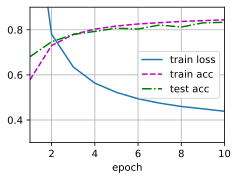

In [5]:
num_epochs = 10

d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

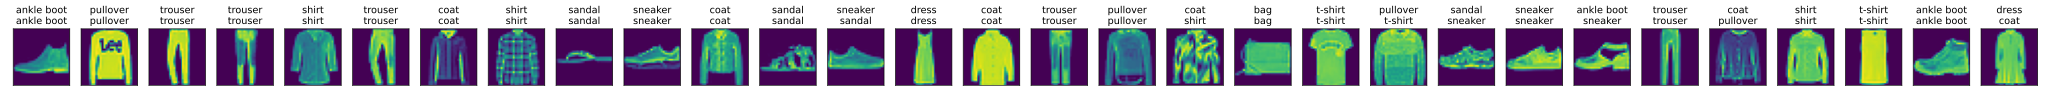

In [7]:
d2l.predict_ch3(net,test_iter,30)